In this notebook we will estimate AR1 models with the trigonometric periodicity component with orders superiors than 1.

In [18]:
cd((@__DIR__) * raw"\..")
include("../table_reader.jl")
include("../utils/utils.jl")
series=extract_series("TX_STAID000031.txt")

38758×2 DataFrame
   Row │ DATE        TX      
       │ Date        Float64 
───────┼─────────────────────
     1 │ 1897-01-01     11.6
     2 │ 1897-01-02     12.3
     3 │ 1897-01-03     13.0
     4 │ 1897-01-04     10.2
     5 │ 1897-01-05     14.0
     6 │ 1897-01-06     11.6
     7 │ 1897-01-07     15.5
     8 │ 1897-01-08     15.1
   ⋮   │     ⋮          ⋮
 38752 │ 2003-03-25     15.1
 38753 │ 2003-03-26     14.3
 38754 │ 2003-03-27     16.3
 38755 │ 2003-03-28     19.2
 38756 │ 2003-03-29     19.7
 38757 │ 2003-03-30     18.3
 38758 │ 2003-03-31     19.0
           38743 rows omitted

# Order = 2

In this model the periodicity $S_t$ will follow this equation :  $S_t = \mu + a_1\cos(\frac{2πt}{365.25}) + b_1\sin(\frac{2πt}{365.25}) + a_2\cos(2 \times \frac{2πt}{365.25}) + b_2\sin(2 \times \frac{2πt}{365.25})$.

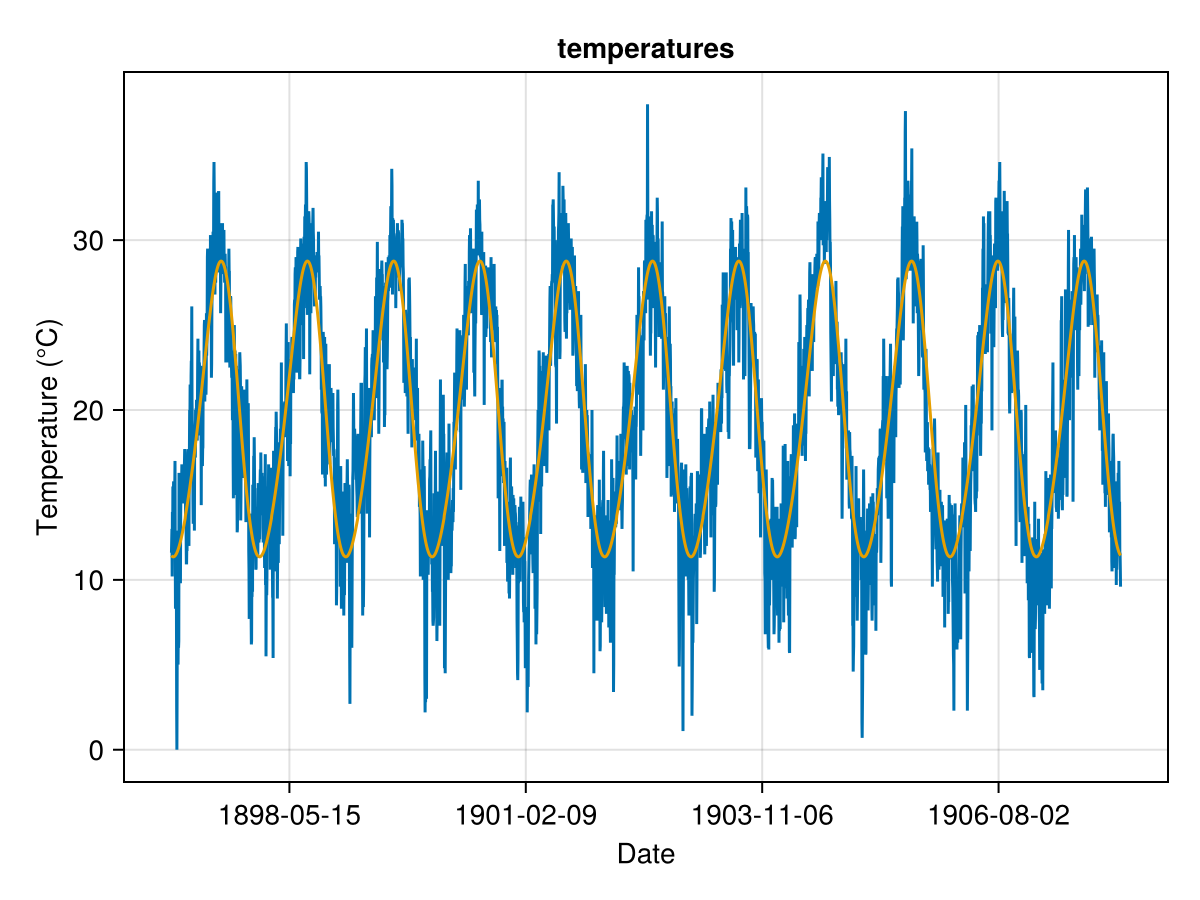

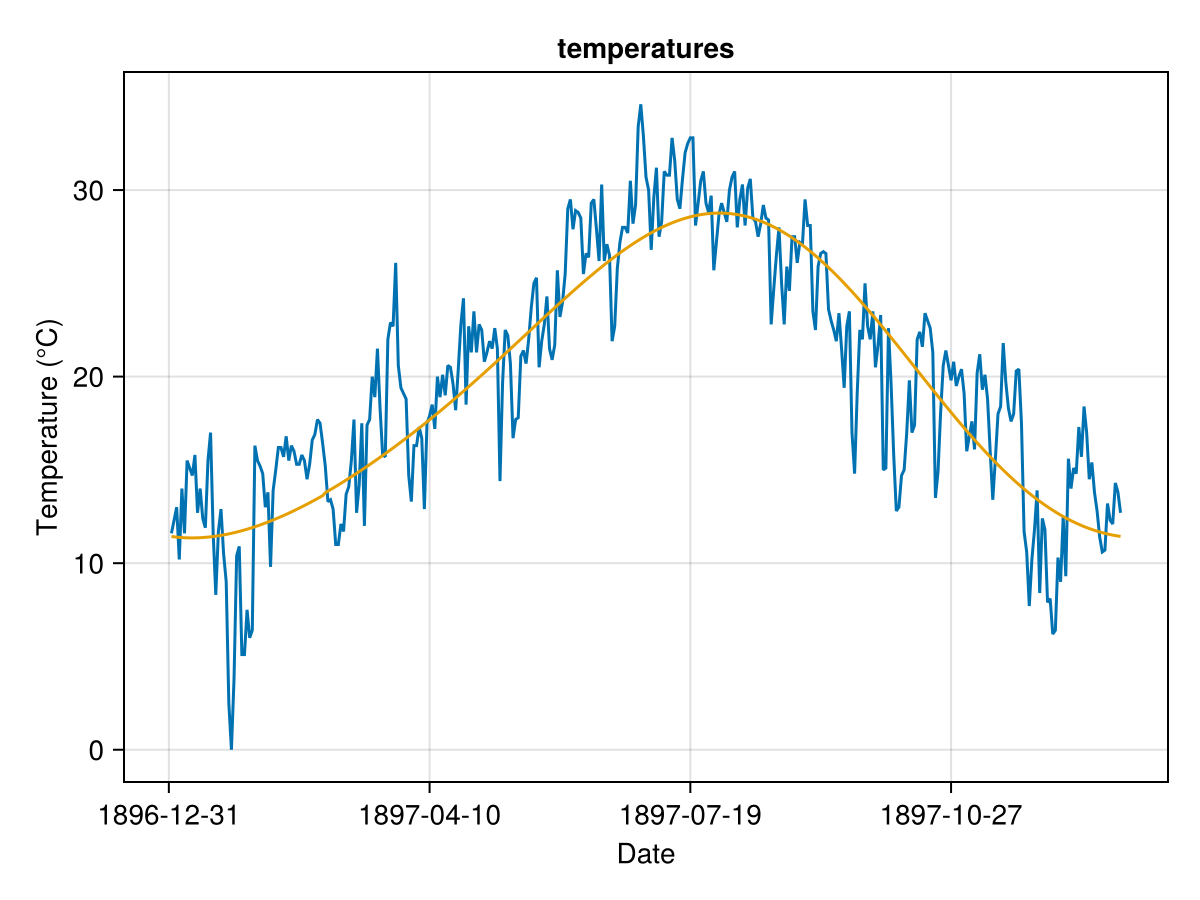

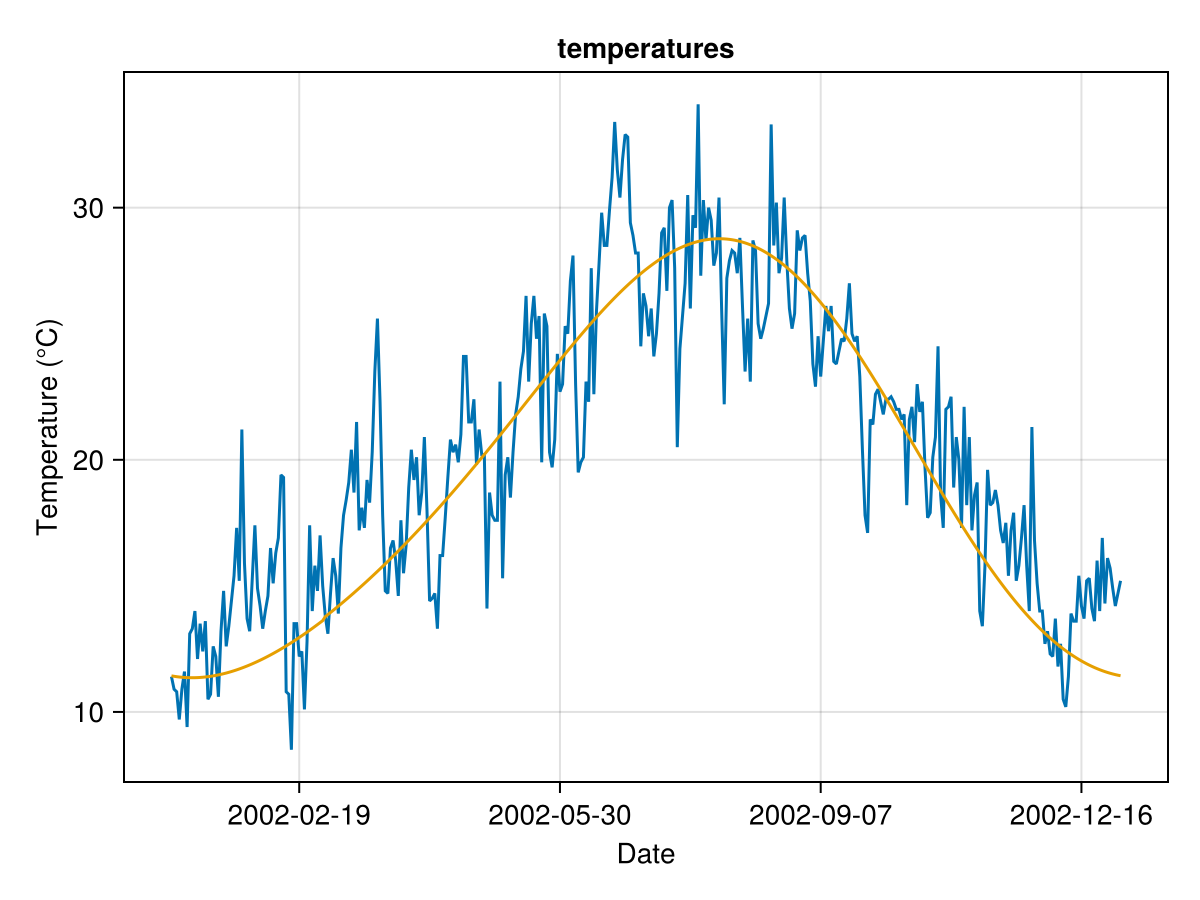

38758-element Vector{Float64}:
  0.16990424312910157
  0.887678833455535
  1.6029762308920539
 -1.1841799047372863
  2.626234851639799
  0.23424564970676798
  4.13987832289992
  3.7431593473804234
  3.344115800888419
  4.44277532153073
  ⋮
  2.7279480284712623
  0.627920107344778
 -0.8728880934175507
 -1.7744729833498916
  0.1231689150622195
  2.920040996818752
  3.316146605235037
  1.8114890631176443
  2.406071704239139

In [19]:
include("../utils/Periodicity.jl")
trigo_function=fitted_periodicity_fonc(series[!,2],series.DATE, OrderTrig=2)
periodicity2=trigo_function.(series.DATE)

Myyear=Iyear(series.DATE,year(series.DATE[1]):year(series.DATE[1]) + 10)
fig1, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity2[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig1)

Myyear=Iyear(series.DATE,year(series.DATE[1]))
fig2, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity2[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig2)

Myyear=Iyear(series.DATE,year(series.DATE[end])-1)
fig3, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity2[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig3)

x=series[!,2]-periodicity2

### Order = 1 versus Order = 2 trigonometric estimation

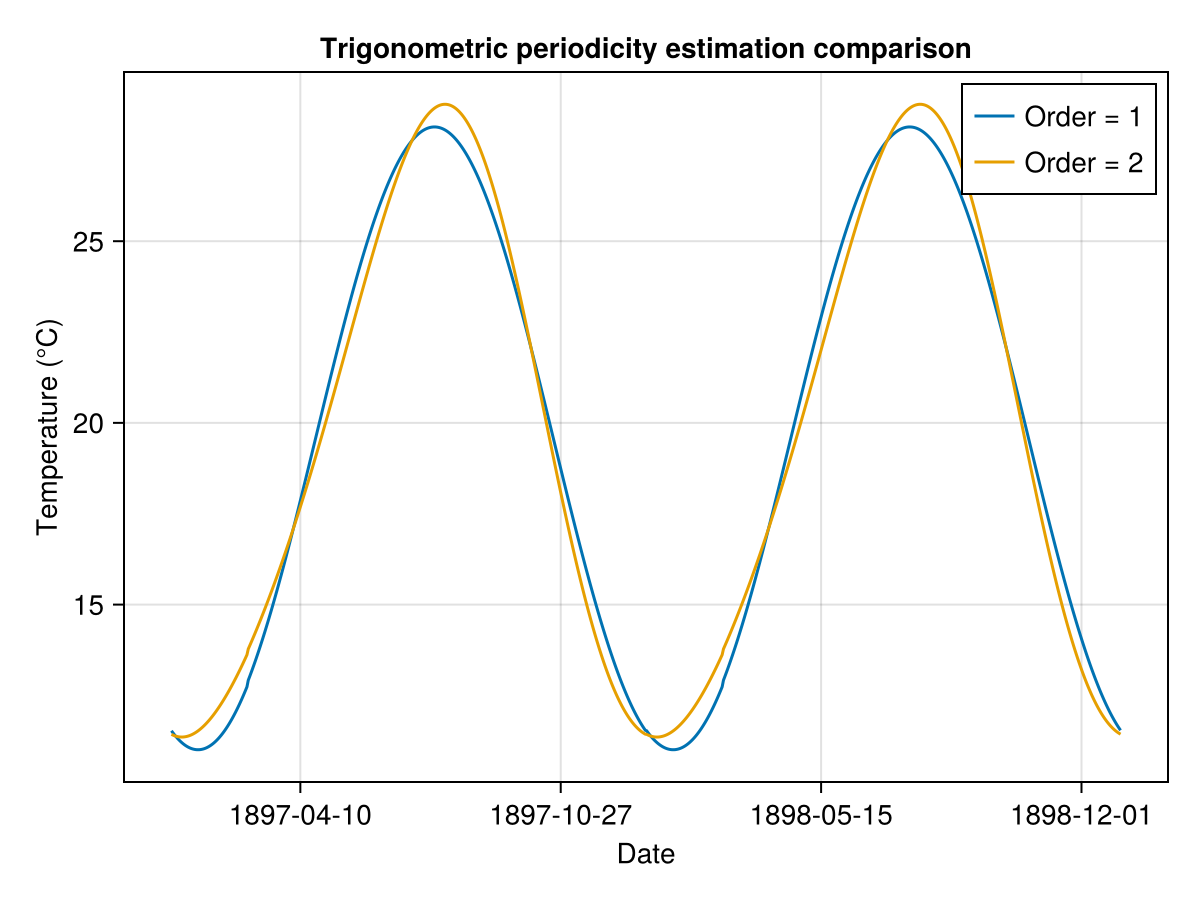

CairoMakie.Screen{IMAGE}


In [20]:
periodicity1=fitted_periodicity_fonc(series[!,2],series.DATE, OrderTrig=1).(series.DATE)

Myyear=Iyear(series.DATE,year(series.DATE[1]):year(series.DATE[1]) + 1)
fig, ax, plt1 = lines(series.DATE[Myyear],periodicity1[Myyear])
plt2 = lines!(ax,series.DATE[Myyear],periodicity2[Myyear])
ax.title="Trigonometric periodicity estimation comparison"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
axislegend(ax,[plt1,plt2],["Order = 1","Order = 2"])
display(fig)


## Autocorrelations

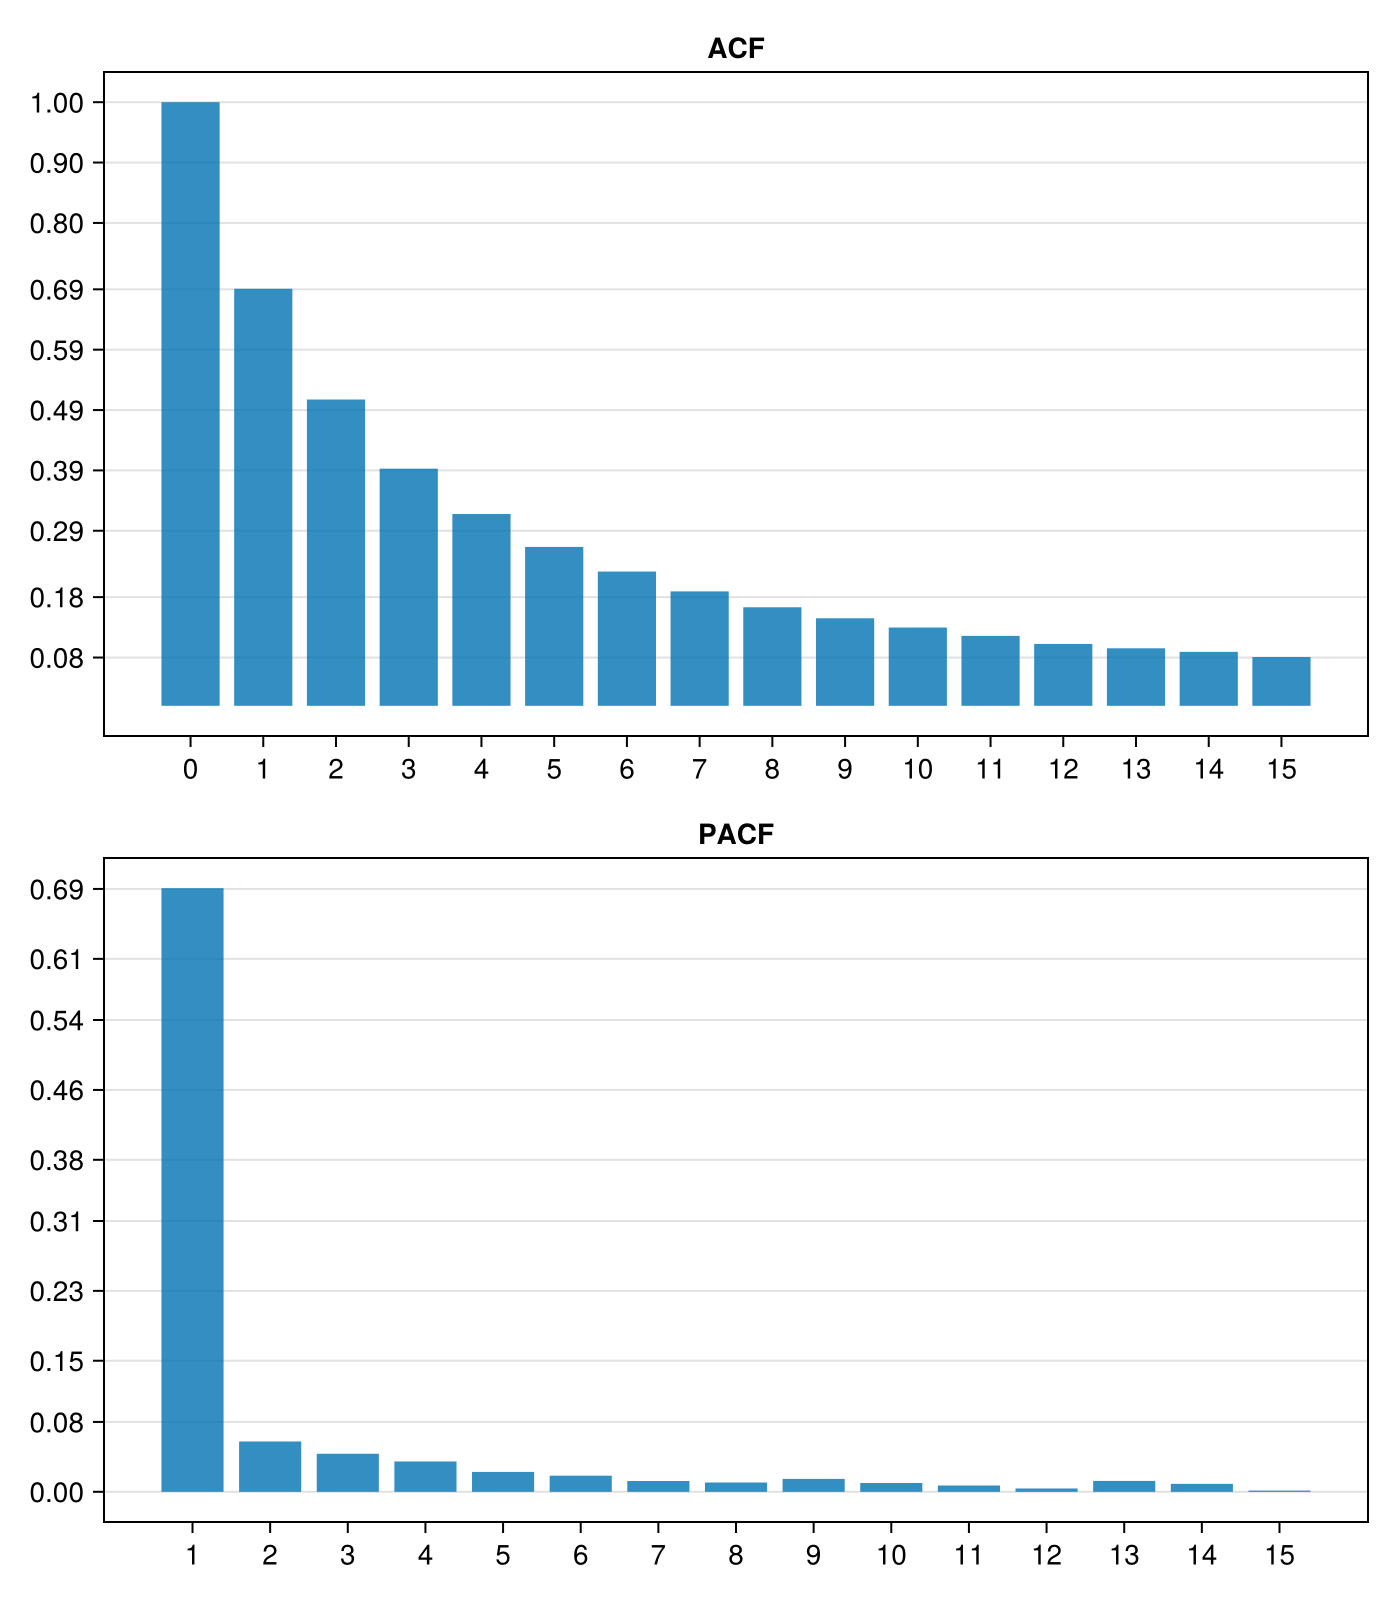

In [21]:
include("../utils/ACF_PACF.jl")
ACF_PACF(x)

It still looks like an AR(1) model

## Estimation with Likelihood : AR(1)

In [22]:
include("../utils/Estimation.jl")
p=1
Φ, σ=LL_AR_Estimation(x,p)

([0.6908944528951166], 2.1887444778180245)

## Sampling simulations

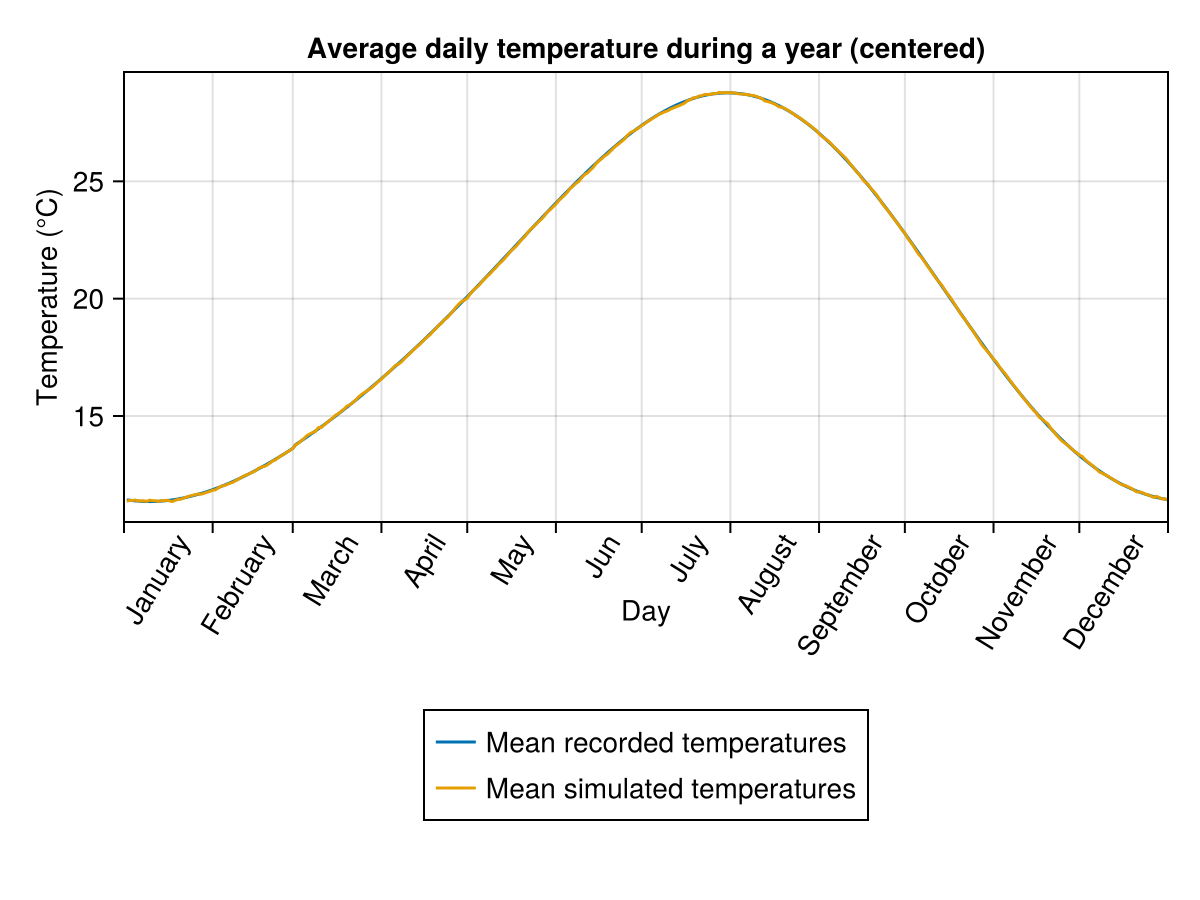

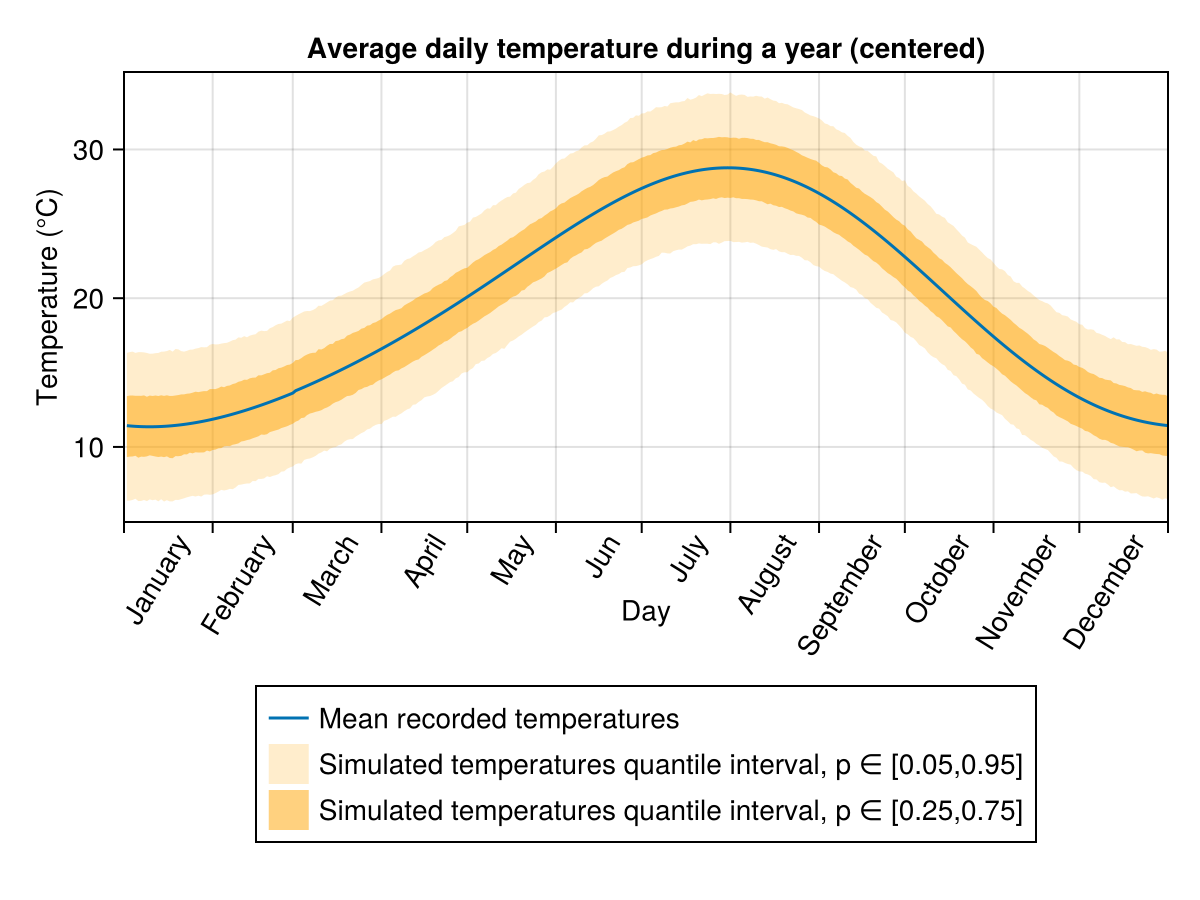

CairoMakie.Screen{IMAGE}


In [23]:
include("../utils/Simulation.jl")
include("../utils/Plotting.jl")
sample_=invert(sample_simulation(x[1:p],Φ,σ,periodicity2,10000))
display(PlotYearCurves([periodicity2[1:365],mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(periodicity2[1:365],
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))

## Estimation with Likelihood : AR(2)

In [24]:
include("../utils/Estimation.jl")
p=2
Φ, σ=LL_AR_Estimation(x,p)

([0.6510878746945571, 0.057616612507490096], 2.185134567278813)

## Sampling simulations

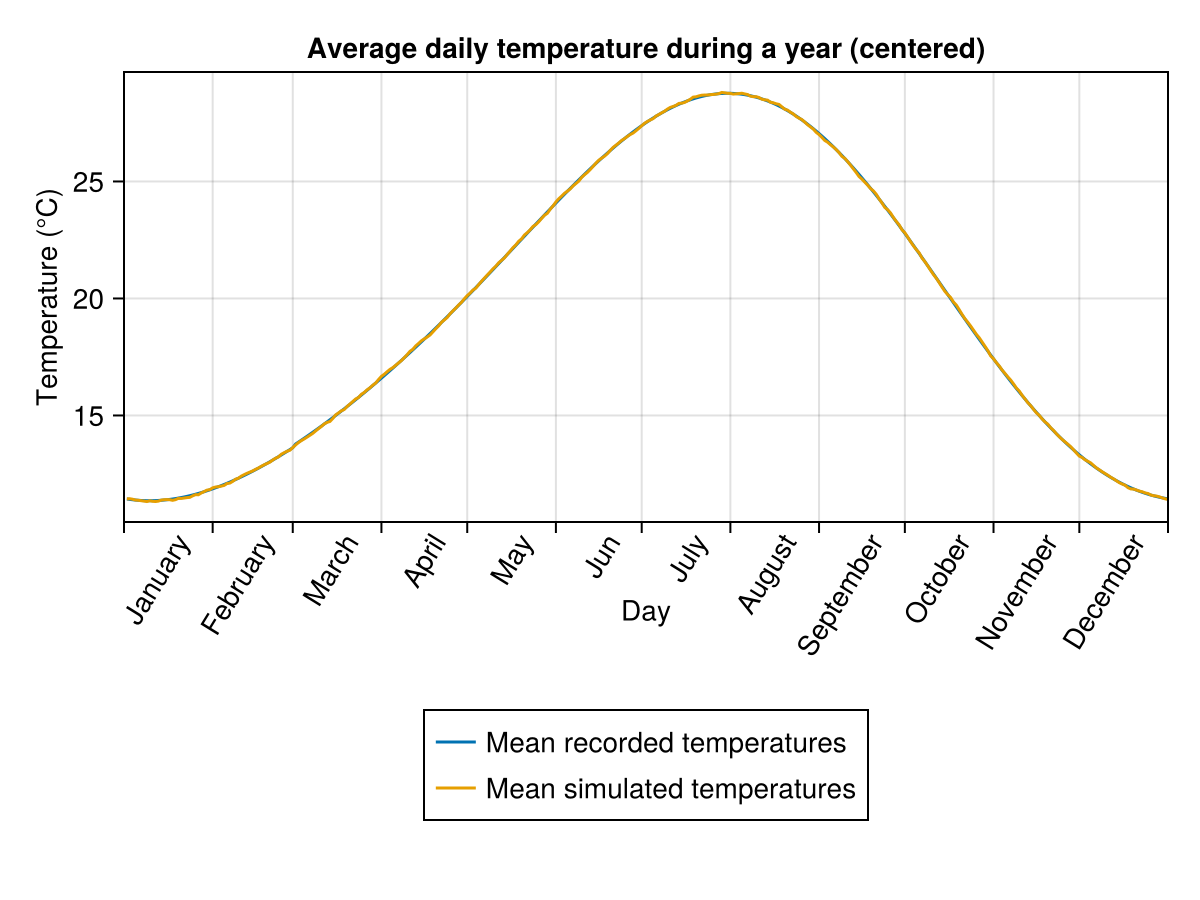

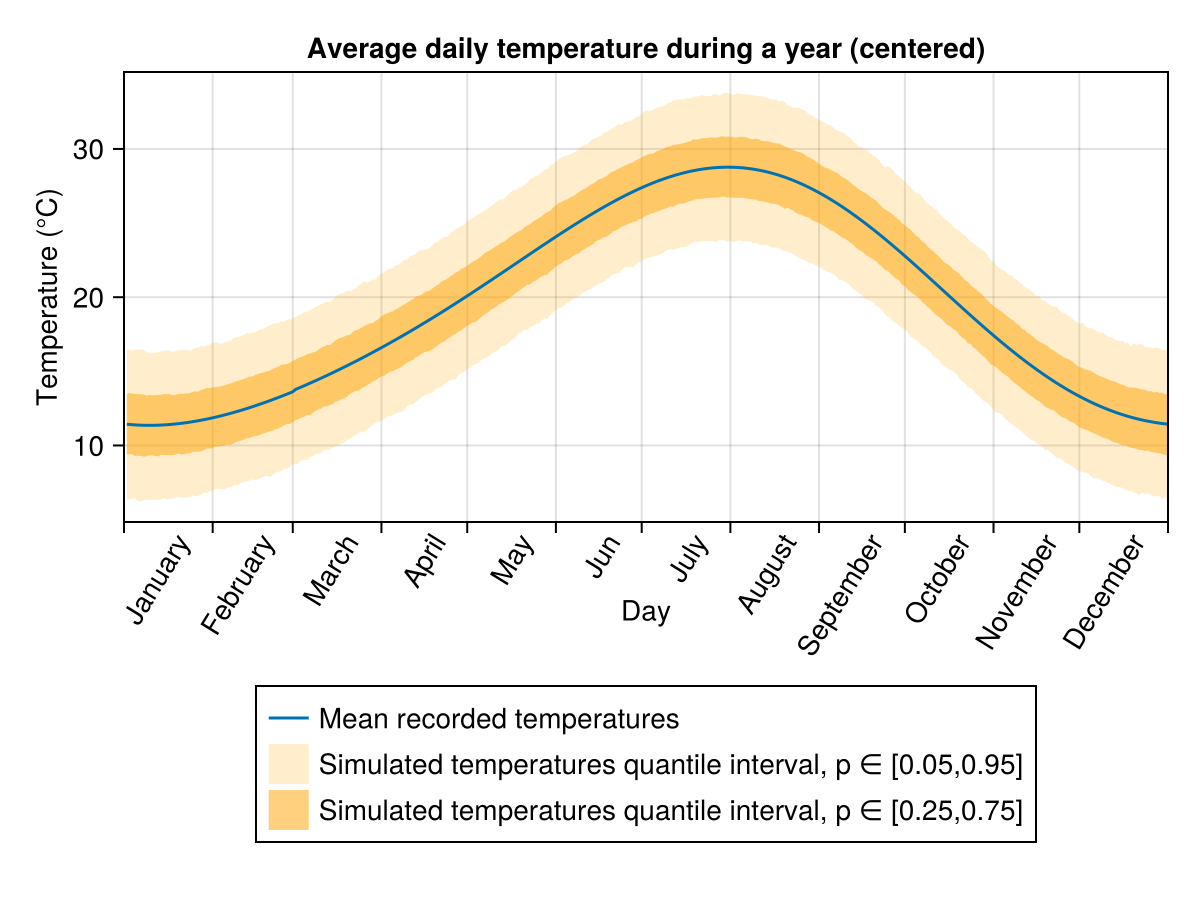

CairoMakie.Screen{IMAGE}


In [25]:
include("../utils/Simulation.jl")
include("../utils/Plotting.jl")
sample_=invert(sample_simulation(x[1:p],Φ,σ,periodicity2,10000))
display(PlotYearCurves([periodicity2[1:365],mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(periodicity2[1:365],
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))

# Order = 3

In this model the periodicity $S_t$ will follow this equation :  $S_t = \mu + a_1\cos(\frac{2πt}{365.25}) + b_1\sin(\frac{2πt}{365.25}) + a_2\cos(2 \times \frac{2πt}{365.25}) + b_2\sin(2 \times \frac{2πt}{365.25}) +
a_3\cos(3 \times \frac{2πt}{365.25}) + b_3\sin(3 \times \frac{2πt}{365.25})$.

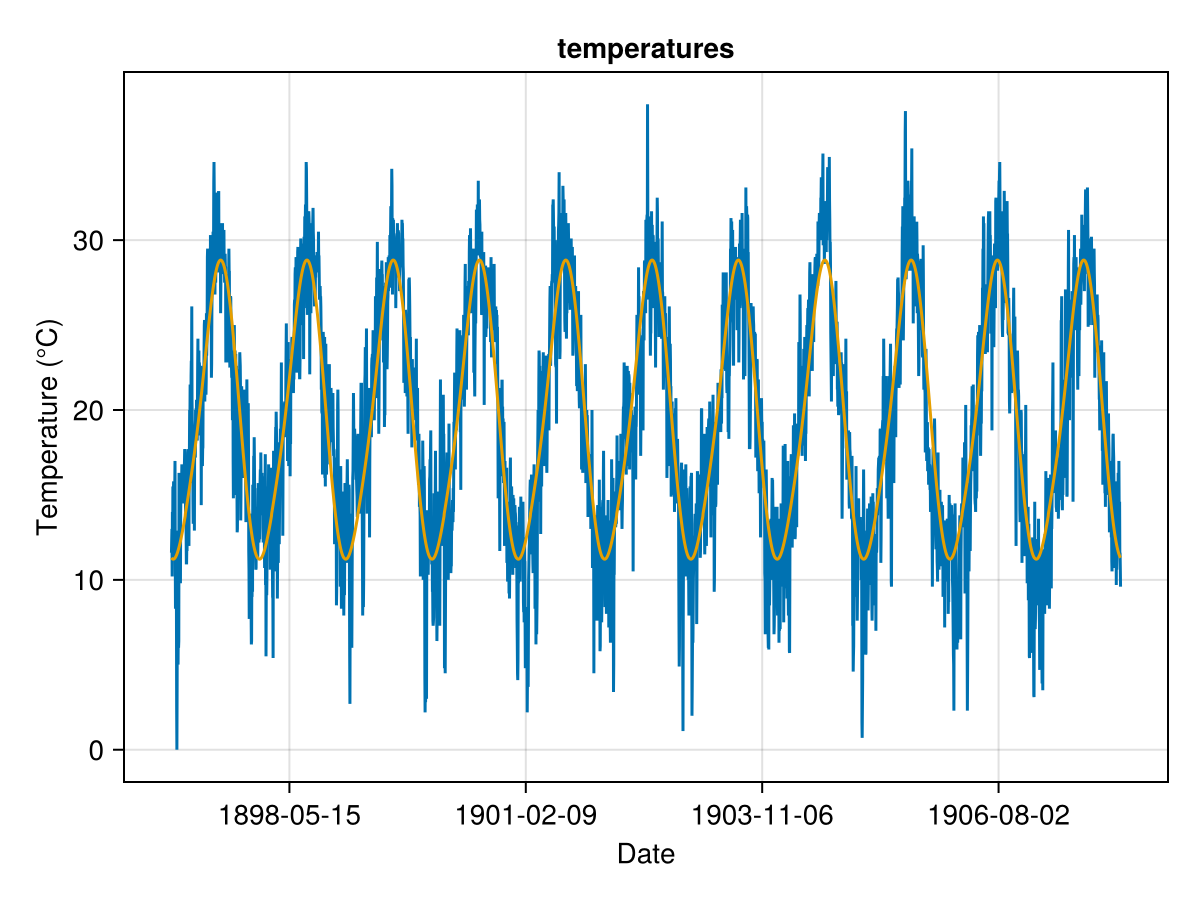

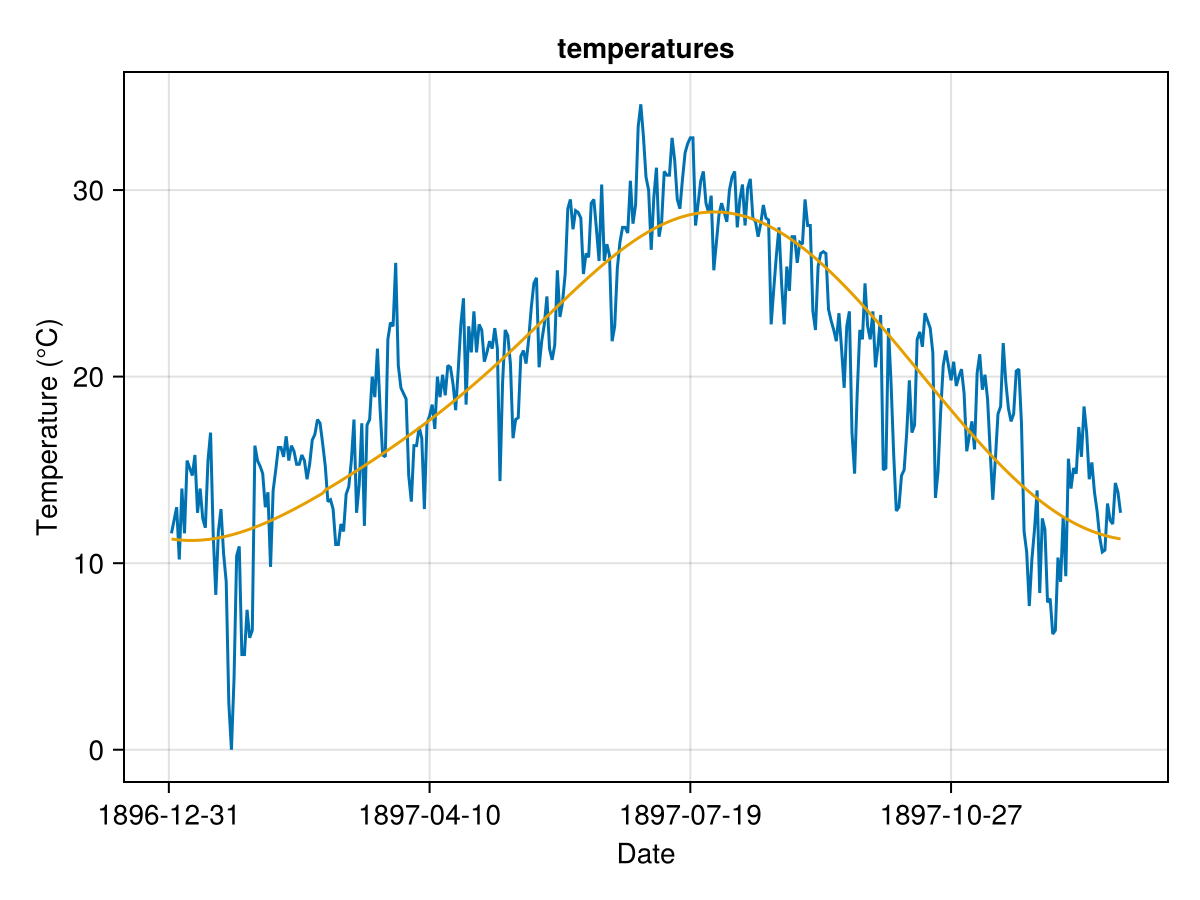

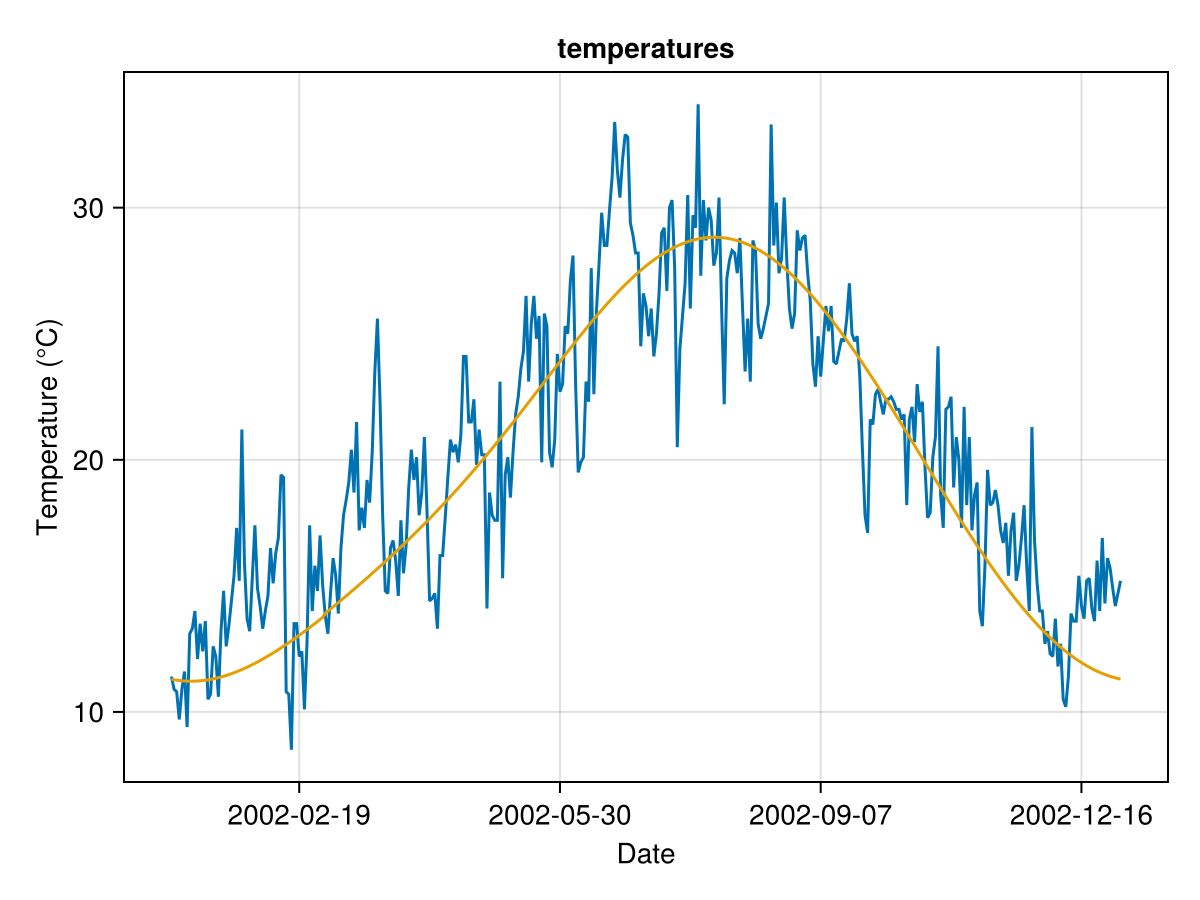

38758-element Vector{Float64}:
  0.3031220105843886
  1.0227502764981207
  1.739537737936601
 -1.0464959409874925
  2.7646706494918156
  0.37306063220811225
  4.278698807622238
  3.8816116155644522
  3.481827094203334
  4.579374836292795
  ⋮
  2.629806840883335
  0.5351673212811061
 -0.9600070677382657
 -1.8557276814811026
  0.0479933976550484
  2.8511434320138918
  3.2537091024317135
  1.7556765837464745
  2.35703162189942

In [26]:
trigo_function=fitted_periodicity_fonc(series[!,2],series.DATE, OrderTrig=3)
periodicity3=trigo_function.(series.DATE)

Myyear=Iyear(series.DATE,year(series.DATE[1]):year(series.DATE[1]) + 10)
fig1, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity3[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig1)

Myyear=Iyear(series.DATE,year(series.DATE[1]))
fig2, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity3[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig2)

Myyear=Iyear(series.DATE,year(series.DATE[end])-1)
fig3, ax = lines(series.DATE[Myyear],series[Myyear,2])
lines!(ax,series.DATE[Myyear],periodicity3[Myyear])
ax.title="temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
display(fig3)

x=series[!,2]-periodicity3

### Comparing orders

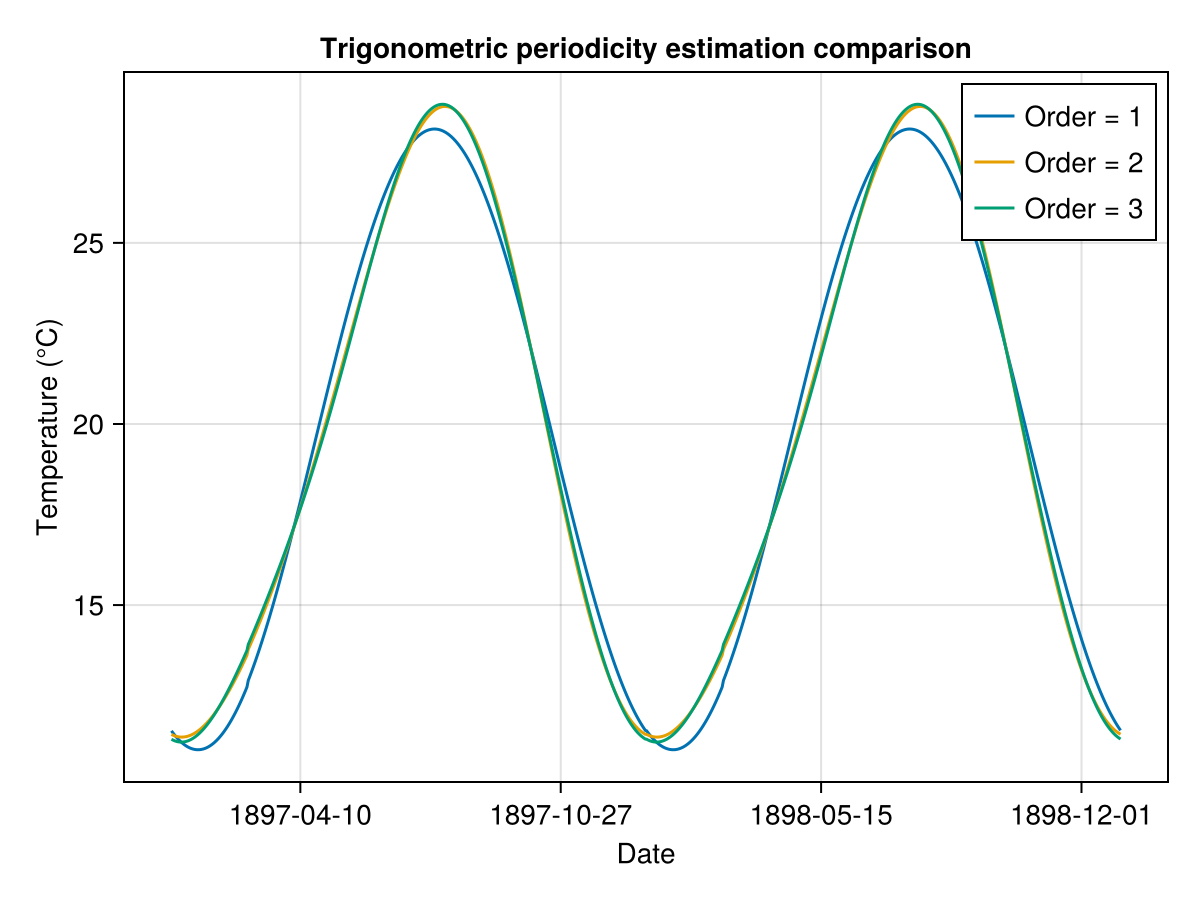

CairoMakie.Screen{IMAGE}


In [27]:

Myyear=Iyear(series.DATE,year(series.DATE[1]):year(series.DATE[1]) + 1)
fig, ax, plt1 = lines(series.DATE[Myyear],periodicity1[Myyear])
plt2 = lines!(ax,series.DATE[Myyear],periodicity2[Myyear])
plt3 = lines!(ax,series.DATE[Myyear],periodicity3[Myyear])
ax.title="Trigonometric periodicity estimation comparison"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
axislegend(ax,[plt1,plt2,plt3],["Order = 1","Order = 2","Order = 3"])
display(fig)


## Autocorrelations

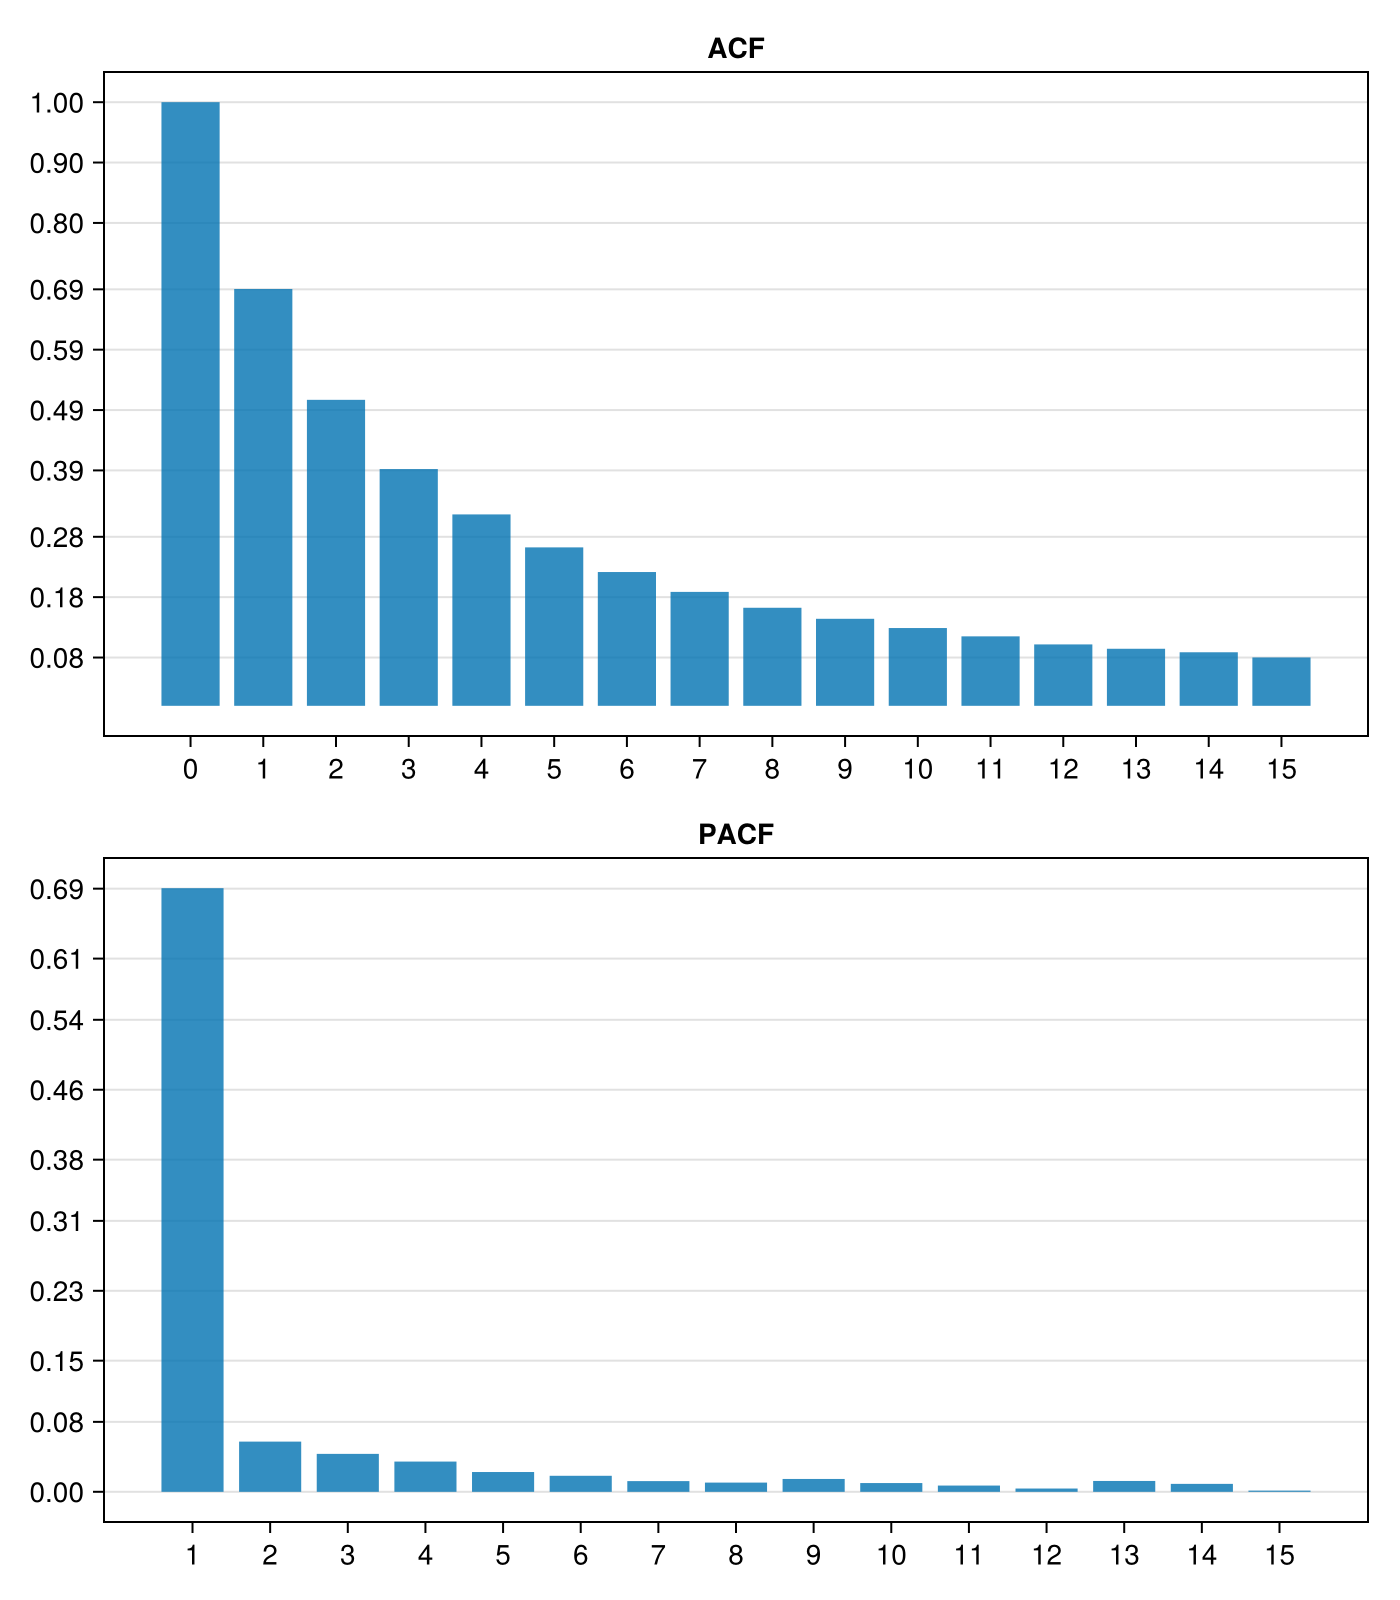

In [28]:
ACF_PACF(x)

It still looks like an AR(1) model

## Estimation with Likelihood : AR(1)

In [29]:
p=1
Φ, σ=LL_AR_Estimation(x,p)

([0.6905599337612793], 2.1885261144360917)

## Sampling simulations

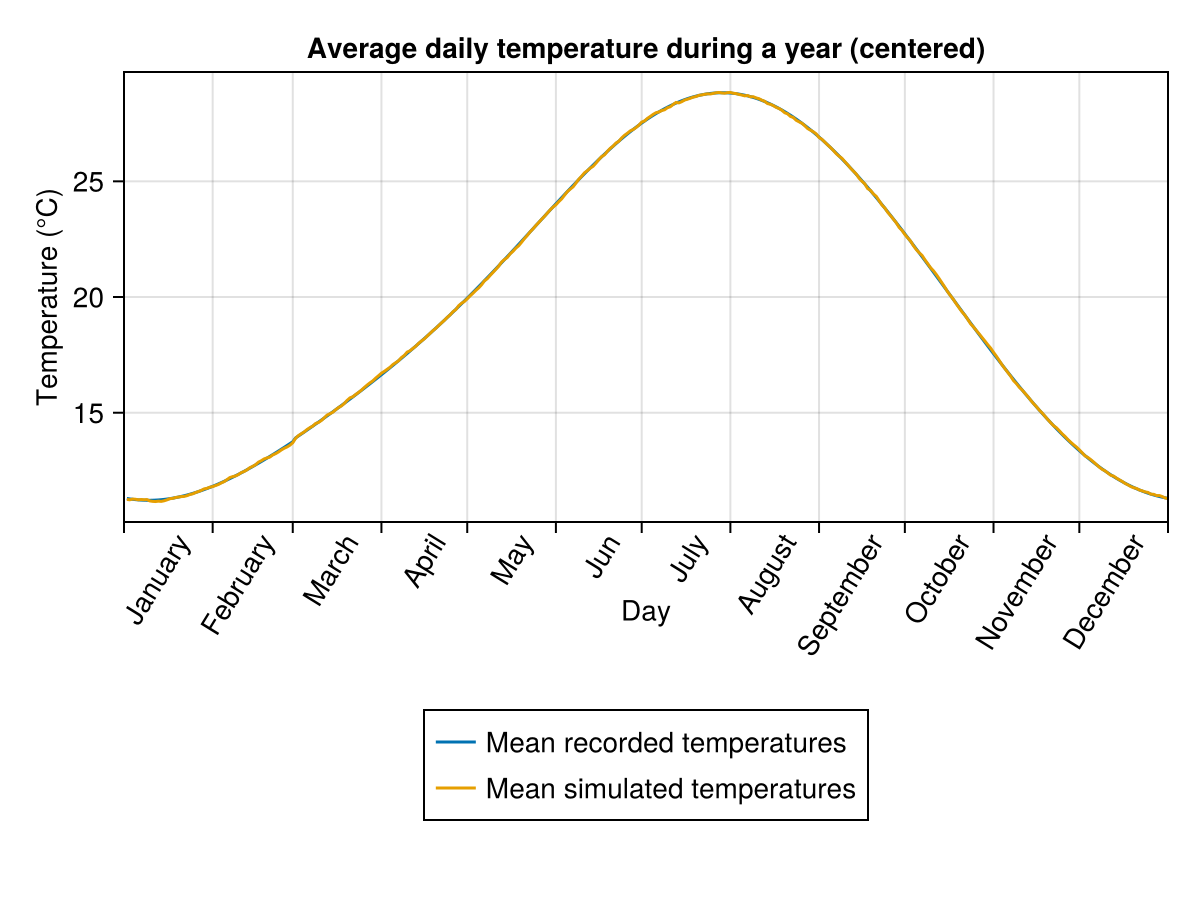

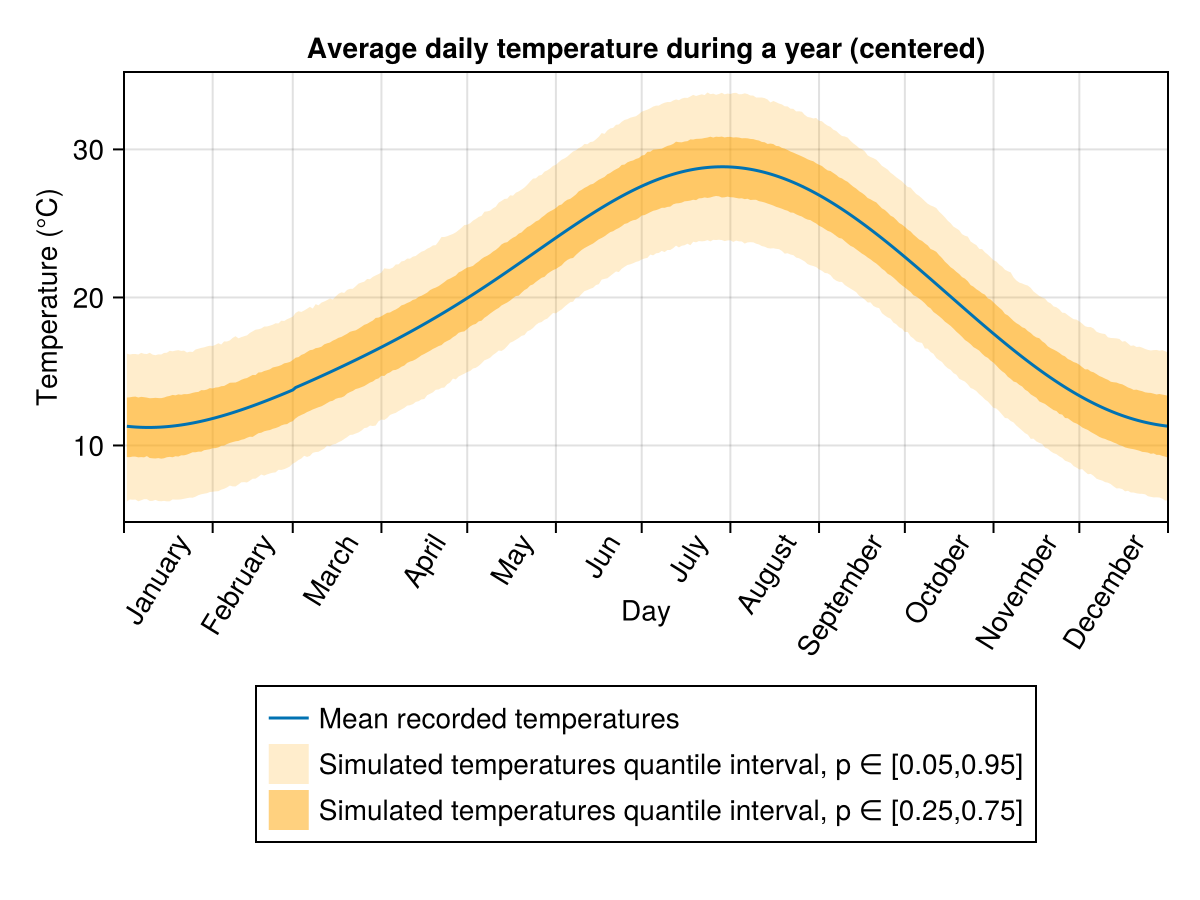

CairoMakie.Screen{IMAGE}


In [30]:
sample_=invert(sample_simulation(x[1:p],Φ,σ,periodicity3,10000))
display(PlotYearCurves([periodicity3[1:365],mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(periodicity3[1:365],
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))

## Estimation with Likelihood : AR(2)

In [ ]:
p = 2
Φ, σ = LL_AR_Estimation(x, p)

([0.6508971496715181, 0.057436440008453576], 2.1849373518517763)

## Sampling simulations

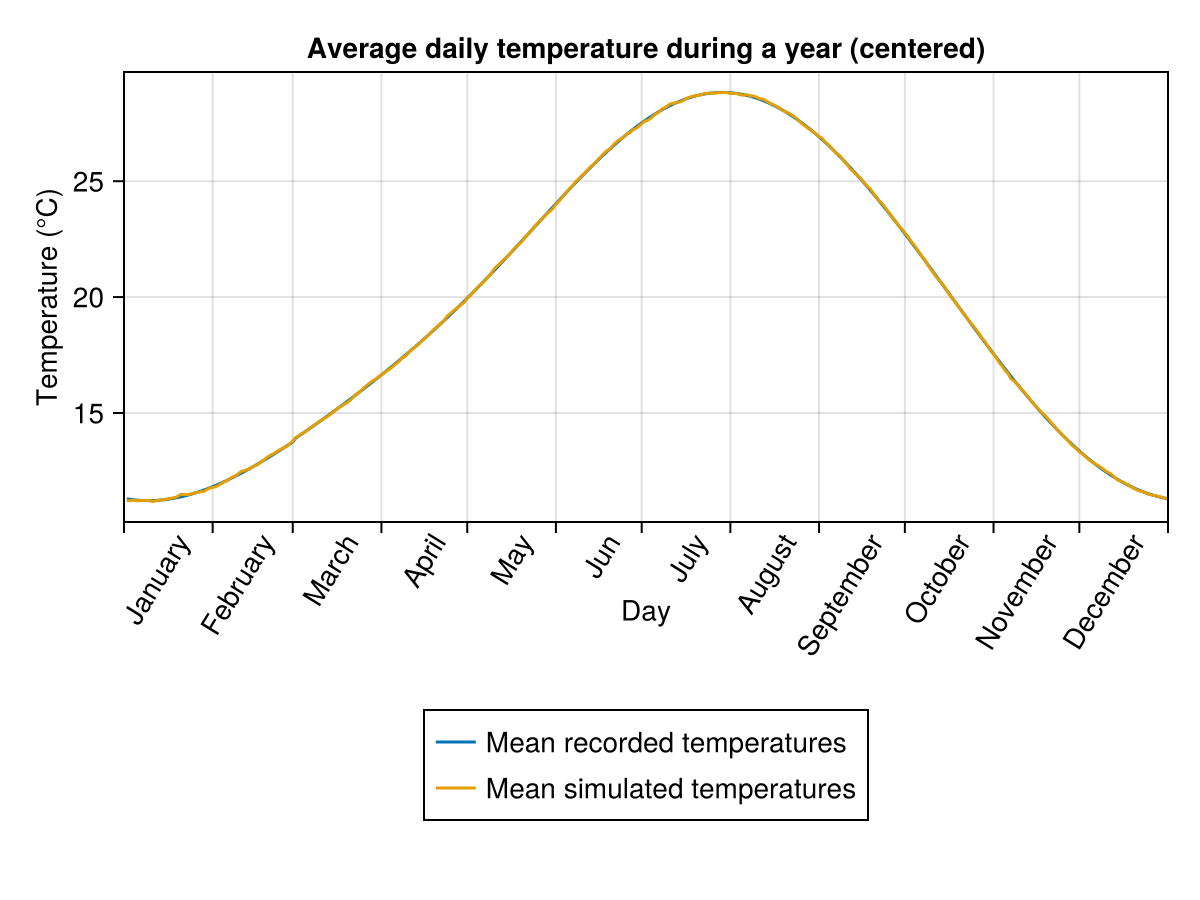

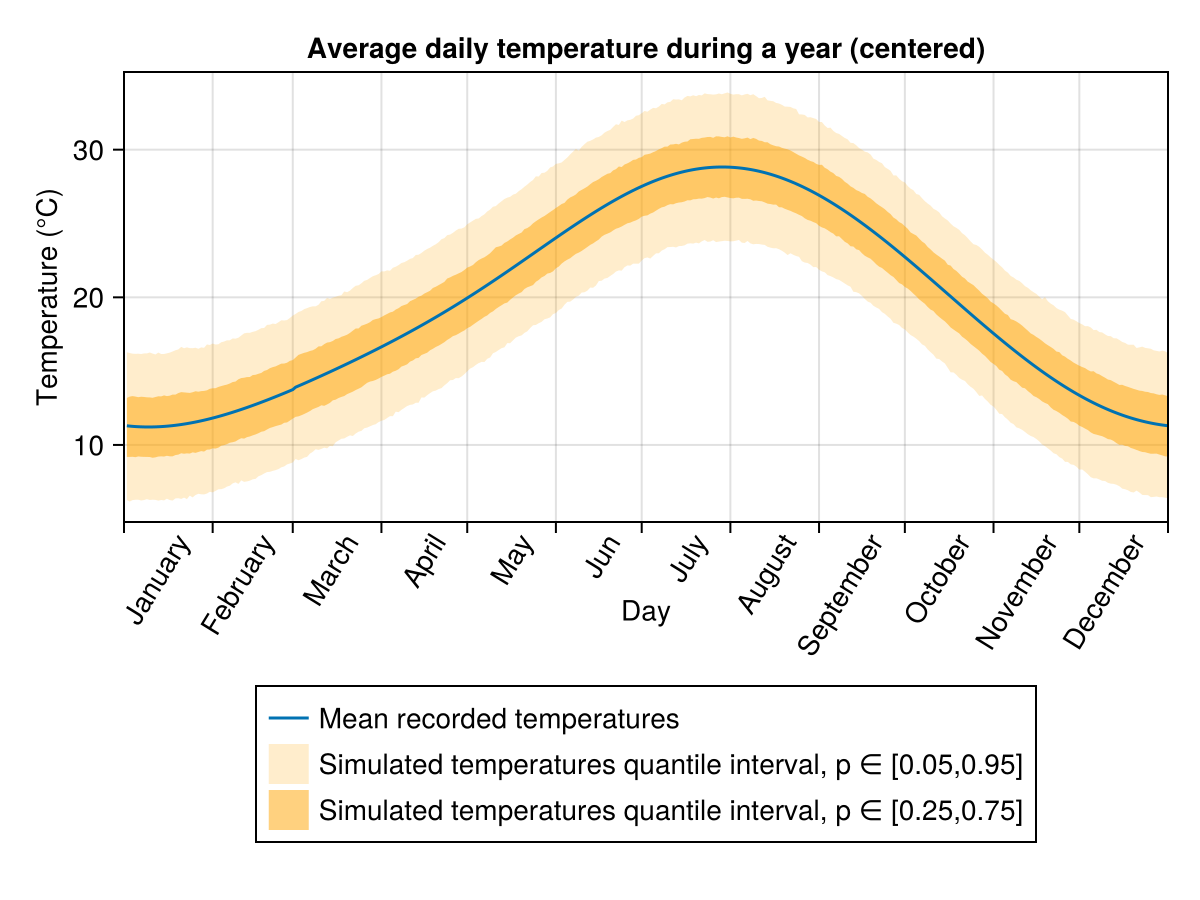

CairoMakie.Screen{IMAGE}


In [32]:
sample_=invert(sample_simulation(x[1:p],Φ,σ,periodicity3,10000))
display(PlotYearCurves([periodicity3[1:365],mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(periodicity3[1:365],
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))